In [1]:
import time
import toolviper

import numpy as np
import matplotlib.pyplot as plt

from casaio.io.table import Table
from casacore.tables import table

In [ ]:
toolviper.utils.data.download(file="VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms", folder="data")

In [2]:
times = []

start_time = time.time()

ctable = table("data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms")
c = ctable.col("DATA")

times.append(time.time() - start_time)
print(f"Time to load full table: {times[0]}")

Successful readonly open of default-locked table data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms: 22 columns, 294144 rows
Time to load full table: 0.008263587951660156


In [5]:
time_array = []

for _ in range(100):
    start_time = time.time()
    
    table = Table(basename="data/VLASS3.2.sb45755730.eb46170641.60480.16266136574.split.v6.ms")
    data = table.get_column(name="DATA")

    time_array.append(time.time() - start_time)

times.append(np.array(time_array).mean())
print(f"Time to load full table: {times[1]}")

Time to load full table: 0.014132499694824219


In [7]:
time_array = []

for i in range(100):
    start_time = time.time()

    data = table.get_column(name="DATA")

    time_array.append(time.time() - start_time)

times.append(np.array(time_array).mean())
print(f"Time to load cached column: {times[2]}")

Time to load cached column: 0.0061841273307800294


In [9]:
data

{1: array([[[ 7.3488884e-02+5.25686666e-02j,  4.4555743e-03+7.84645788e-03j,
           9.2962189e-03+2.39176303e-03j, ...,
           1.0191374e-02-5.70804812e-03j, -4.4126497e-03+2.10389751e-03j,
           8.5880654e-03-3.43286269e-03j],
         [ 7.3565086e-03+3.84551613e-03j, -2.6445631e-03-2.67913775e-03j,
           7.1006012e-03+3.15537094e-03j, ...,
          -2.6614866e-03+3.79486196e-03j,  1.4643735e-03-6.72741153e-04j,
          -6.6105607e-03-6.97790552e-03j],
         [ 5.9907450e-03-6.79814140e-04j, -2.5543449e-03-1.03044941e-03j,
           4.5598131e-03+1.57886732e-03j, ...,
          -2.0875467e-03+9.66691040e-03j, -4.4779843e-03-2.26807618e-03j,
           9.0212431e-03+4.36785957e-03j]],
 
        [[ 1.1091148e-02+1.63708755e-03j,  1.3580914e-03+1.06401686e-02j,
           2.0783670e-04-2.46795453e-03j, ...,
          -3.0215419e-04+1.54078437e-03j,  4.3676458e-03+2.28793267e-03j,
          -5.4921890e-03-2.80591962e-03j],
         [ 7.5932749e-04+3.68063804e-04j, 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (6,).

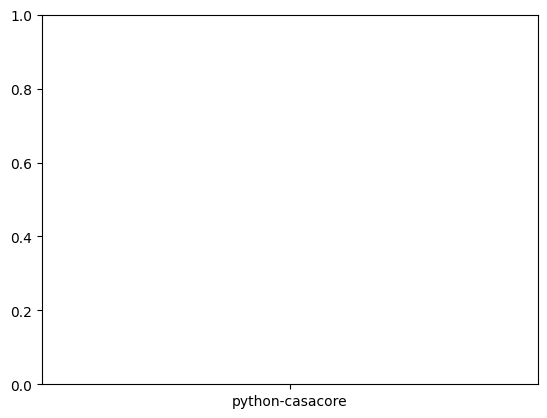

In [8]:
fig, ax = plt.subplots()

labels = ["python-casacore", "casaio", "casaio-cached"]
bar_labels = ["cpy-cc", "cio", "cio-cached"]
bar_colors = ["tab:red", "tab:blue", "tab:orange"]


ax.bar(labels, times, label=bar_labels, color=bar_colors)

ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of DATA column query times')

plt.show()